<a href="https://colab.research.google.com/github/guptapallavi30/ScalableML_1/blob/exploration/PhishingLinkClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

# Upload your Kaggle API key file to "/content/kaggle/kaggle.json"
# Replace "/content/kaggle/kaggle.json" with the path where you placed your Kaggle API key file in Colab.
!mkdir -p ~/.kaggle
!cp "../content/kaggle/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# Download the dataset
import pandas as pd

# Replace "narendrageek/my-dear-watson-translated-text" with the dataset name you want to use.
!kaggle datasets download -d shashwatwork/phishing-dataset-for-machine-learning -p /content

  0% 0.00/234k [00:00<?, ?B/s]
100% 234k/234k [00:00<00:00, 65.6MB/s]


In [3]:
# Unzip the downloaded dataset (if necessary).
import zipfile
with zipfile.ZipFile("/content/phishing-dataset-for-machine-learning.zip", "r") as zip_ref:
    zip_ref.extractall("/content")

In [4]:

# Read the dataset into a pandas DataFrame.
df = pd.read_csv("/content/Phishing_Legitimate_full.csv")

In [5]:
df

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [6]:
df.isnull().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [7]:
df.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [8]:
for i in df.columns:
  print(i)
  print(df[i].value_counts())

id
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: id, Length: 10000, dtype: int64
NumDots
2     4053
3     2723
1     1959
4      795
5      239
6      100
7       49
8       26
15      10
9       10
14       9
11       8
12       6
10       6
13       4
16       2
21       1
Name: NumDots, dtype: int64
SubdomainLevel
0     4835
1     4790
2      272
4       30
6       26
3       22
7        7
5        6
8        5
9        3
11       2
14       1
10       1
Name: SubdomainLevel, dtype: int64
PathLevel
3     2485
2     2445
4     1618
5     1261
1      882
6      464
0      335
7      226
8      130
9       79
10      29
11      16
14      10
12       8
13       5
15       3
18       3
16       1
Name: PathLevel, dtype: int64
UrlLength
48     192
57     192
47     189
60     189
59     182
      ... 
224      1
229      1
228      1
251      1
185      1
Name: UrlLength, Length: 226, dtype: int64
NumDash
0 

In [9]:
print(df.HttpsInHostname.value_counts())
print(len(df.id.value_counts()))

0    10000
Name: HttpsInHostname, dtype: int64
10000


HttpsInHostname has all 0s.

id is all unique.

In [10]:
# Remove column name 'HttpsInHostname' and 'id'
df.drop(['HttpsInHostname', 'id'], axis=1, inplace=True)

The kaggle dataset does not mention what each attribute means. With the help of ChatGPT, I created a list to infer what the attributes are tracking. Here is the generated list:

It seems like you're working on creating a phishing detection machine learning model using a dataset from Kaggle. The attributes you've listed appear to be various features or characteristics extracted from URLs. Here's a brief explanation of what each attribute might represent:

1. **NumDots**: The number of dots (periods) in the URL.

2. **SubdomainLevel**: The level of subdomains in the URL's domain structure.

3. **PathLevel**: The depth of the URL's path.

4. **UrlLength**: The length of the URL.

5. **NumDash**: The number of dashes in the URL.

6. **NumDashInHostname**: The number of dashes in the URL's hostname.

7. **AtSymbol**: The presence of the "@" symbol in the URL.

8. **TildeSymbol**: The presence of the "~" symbol in the URL.

9. **NumUnderscore**: The number of underscore characters in the URL.

10. **NumPercent**: The number of percent "%" characters in the URL.

11. **NumQueryComponents**: The number of components in the query part of the URL.

12. **NumAmpersand**: The number of ampersand "&" characters in the URL.

13. **NumHash**: The number of hash "#" characters in the URL.

14. **NumNumericChars**: The number of numeric characters in the URL.

15. **NoHttps**: Whether the URL does not use the HTTPS protocol.

16. **RandomString**: The presence of a random string in the URL.

17. **IpAddress**: The presence of an IP address in the URL.

18. **DomainInSubdomains**: Whether the domain is included in the subdomains.

19. **DomainInPaths**: Whether the domain is included in the URL's path.

20. **HttpsInHostname**: Whether "https" is present in the hostname. ALL ZEROS. REMOVED FROM DF.

21. **HostnameLength**: The length of the hostname.

22. **PathLength**: The length of the URL's path.

23. **QueryLength**: The length of the query component of the URL.

24. **DoubleSlashInPath**: The presence of a double slash "//" in the URL's path.

25. **NumSensitiveWords**: The number of sensitive words in the URL.

26. **EmbeddedBrandName**: Whether a brand name is embedded in the URL.

27. **PctExtHyperlinks**: The percentage of external hyperlinks on the page.

28. **PctExtResourceUrls**: The percentage of external resource URLs.

29. **ExtFavicon**: The presence of an external favicon.

30. **InsecureForms**: The presence of insecure forms on the page.

31. **RelativeFormAction**: Whether form actions are relative.

32. **ExtFormAction**: The presence of an external form action.

33. **AbnormalFormAction**: The presence of abnormal form actions.

34. **PctNullSelfRedirectHyperlinks**: The percentage of null self-redirect hyperlinks.

35. **FrequentDomainNameMismatch**: The frequency of domain name mismatches.

36. **FakeLinkInStatusBar**: The presence of fake links in the status bar.

37. **RightClickDisabled**: Whether right-click is disabled.

38. **PopUpWindow**: The presence of pop-up windows.

39. **SubmitInfoToEmail**: Whether information is submitted to an email address.

40. **IframeOrFrame**: The presence of iframes or frames.

41. **MissingTitle**: The presence of missing page titles.

42. **ImagesOnlyInForm**: Whether there are only images in forms.

43. **SubdomainLevelRT**: The subdomain level in relation to the URL's length.

44. **UrlLengthRT**: The URL length in relation to the URL's hostname length.

45. **PctExtResourceUrlsRT**: The percentage of external resource URLs in relation to the URL's length.

46. **AbnormalExtFormActionR**: The abnormality of external form actions in relation to the URL's length.

47. **ExtMetaScriptLinkRT**: The presence of external meta, script, or link references in relation to the URL's length.

48. **PctExtNullSelfRedirectHyperlinksRT**: The percentage of external null self-redirect hyperlinks in relation to the URL's length.

-----------
From this list, We can note these attributes:
- *#20 **HttpsInHostname** REMOVED FROM DF.
-  #25. **NumSensitiveWords** Don't have an explicit list to determine 'sensitive words' from which dataset was created from. Same with Brand names in #26. **EmbeddedBrandName**, 35.**FrequentDomainNameMismatch**, and #16 **RandomString**
- #43 and #44 are related to another attribute in the dataset. Therefore, their value isnt required to be sent as an attribute.
- #27 - #34; #36 - #42; #45 - #48 all require opening the page, which - for the sake of predicting custom test cases - we want to avoid.

To simplify our model, we will remove those attributes that require opening the link or have ambiguity in determining its value: ie. atttributes that have been collected with unspecified lists.

In [11]:
# Remove columns with unspecified attributes AND columns that require opening the link
attributes = [
    'RandomString',
    'NumSensitiveWords',
    'EmbeddedBrandName',
    'PctExtHyperlinks',
    'PctExtResourceUrls',
    'ExtFavicon',
    'InsecureForms',
    'RelativeFormAction',
    'ExtFormAction',
    'AbnormalFormAction',
    'PctNullSelfRedirectHyperlinks',
    'FrequentDomainNameMismatch',
    'FakeLinkInStatusBar',
    'RightClickDisabled',
    'PopUpWindow',
    'SubmitInfoToEmail',
    'IframeOrFrame',
    'MissingTitle',
    'ImagesOnlyInForm',
    'SubdomainLevelRT',
    'UrlLengthRT',
    'PctExtResourceUrlsRT',
    'AbnormalExtFormActionR',
    'ExtMetaScriptLinkRT',
    'PctExtNullSelfRedirectHyperlinksRT'
]

df.drop(attributes, axis=1, inplace=True)


In [12]:
class_label_column = df['CLASS_LABEL']
df.drop(['CLASS_LABEL'], axis=1, inplace=True)

In [13]:
df.describe()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,NumHash,NumNumericChars,NoHttps,IpAddress,DomainInSubdomains,DomainInPaths,HostnameLength,PathLength,QueryLength,DoubleSlashInPath
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,...,0.002300,5.810300,0.988800,0.017200,0.022200,0.428900,18.82430,35.564900,8.606500,0.000900
std,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,...,0.047906,9.617877,0.105241,0.130023,0.147341,0.494944,8.11654,24.588502,24.313053,0.029988
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.00000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,14.00000,18.000000,0.000000,0.000000
50%,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,18.00000,30.000000,0.000000,0.000000
75%,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,8.000000,1.000000,0.000000,0.000000,1.000000,22.00000,48.000000,0.000000,0.000000
max,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,19.000000,...,1.000000,111.000000,1.000000,1.000000,1.000000,1.000000,137.00000,161.000000,188.000000,1.000000


In [14]:
# Need to compare: df plain values, squared values of those values whose range is greater than 3. (squaring -1,0,1 will not change its values)

In [15]:
# Correlation graphs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

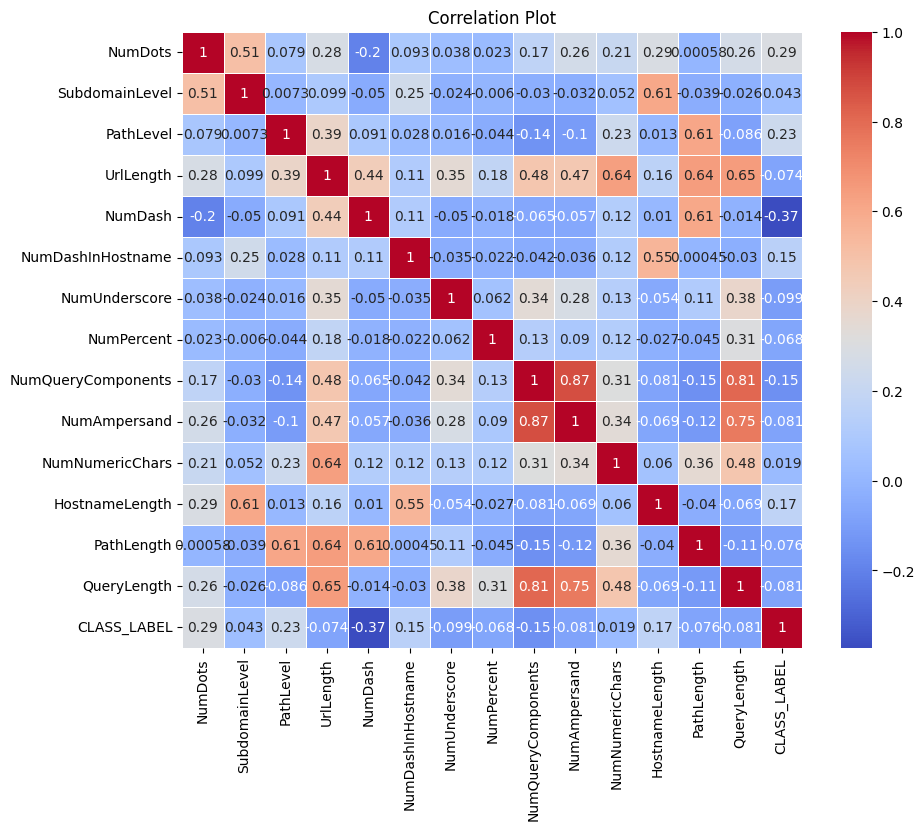

In [38]:
correlation_matrix_test_df = pd.concat([df, class_label_column], axis=1).corr()
# Create a correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_test_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Plot")
plt.show()

In [16]:
multiple_values_df = df
for i in df.columns:
  if len(df[i].unique()) <= 3:
    multiple_values_df.drop([i], axis=1, inplace=True)

In [17]:
multiple_values_df.columns

Index(['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'NumUnderscore', 'NumPercent',
       'NumQueryComponents', 'NumAmpersand', 'NumNumericChars',
       'HostnameLength', 'PathLength', 'QueryLength'],
      dtype='object')

In [18]:
# Combine all dfs together for correlation matrices
squared_df = multiple_values_df ** 2
squared_df.columns = squared_df.columns.to_list()
squared_df.columns = pd.Index([col + '_sq' for col in squared_df.columns])
df_all = pd.concat([df, squared_df], axis=1)

In [19]:
df_all

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,...,NumDash_sq,NumDashInHostname_sq,NumUnderscore_sq,NumPercent_sq,NumQueryComponents_sq,NumAmpersand_sq,NumNumericChars_sq,HostnameLength_sq,PathLength_sq,QueryLength_sq
0,3,1,5,72,0,0,0,0,0,0,...,0,0,0,0,0,0,0,441,1936,0
1,3,1,3,144,0,0,2,0,2,1,...,0,0,4,0,4,1,1681,289,256,10609
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,729,576,0
3,3,1,6,79,1,0,0,0,0,0,...,1,0,0,0,0,0,0,484,2500,0
4,3,0,4,46,0,0,0,0,0,0,...,0,0,0,0,0,0,4,100,841,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,1,50,0,0,0,0,2,1,...,0,0,0,0,4,1,81,225,100,289
9996,2,1,4,59,1,0,0,0,0,0,...,1,0,0,0,0,0,0,361,1089,0
9997,2,1,4,57,0,0,0,0,0,0,...,0,0,0,0,0,0,36,256,1156,0
9998,3,1,1,49,0,0,0,0,1,0,...,0,0,0,0,1,0,9,225,169,169


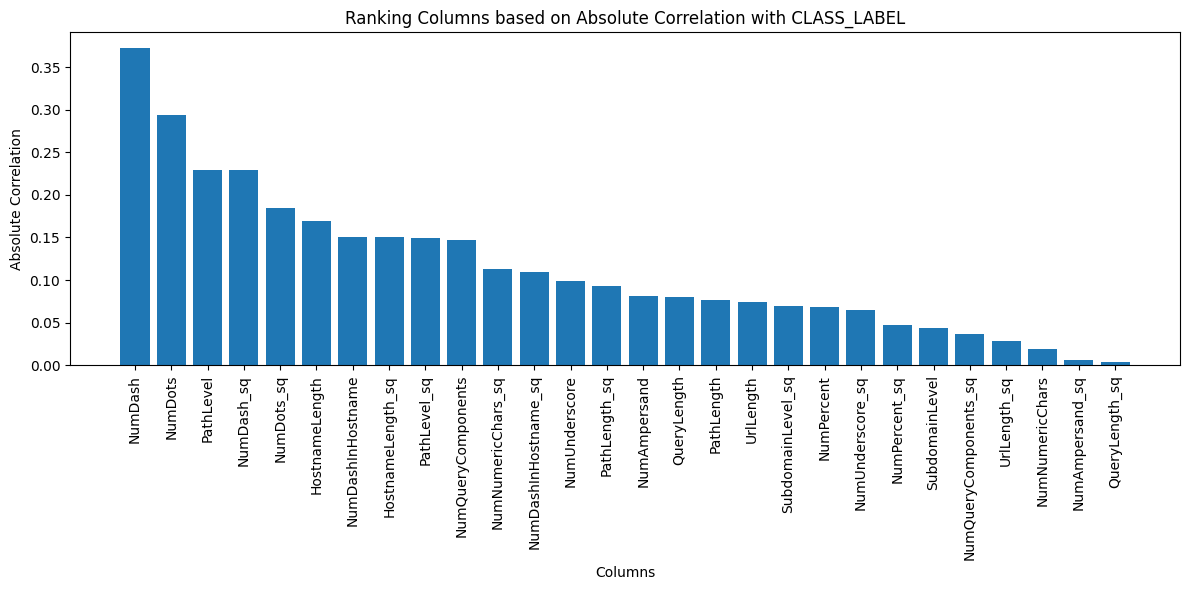

In [20]:
# Step 1: Create correlation matrices
correlation_matrix_df = pd.concat([df_all, class_label_column], axis=1).corr()

# Step 2: Extract correlation values for each dataset
col_corrs_df = correlation_matrix_df['CLASS_LABEL'].drop('CLASS_LABEL')

# Convert the Series to a DataFrame and assign the column name
col_corrs_df = col_corrs_df.to_frame(name='df_all_correlation')

# Step 3: Plot col_corrs_df in a histogram
plt.figure(figsize=(12, 6))
col_corrs_df['abs_correlation'] = np.abs(col_corrs_df).mean(axis=1)
col_corrs_df_sorted = col_corrs_df.sort_values(by='abs_correlation', ascending=False)
col_corrs_df_sorted = col_corrs_df_sorted
plt.bar(col_corrs_df_sorted.index, col_corrs_df_sorted['abs_correlation'])
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Absolute Correlation')
plt.title('Ranking Columns based on Absolute Correlation with CLASS_LABEL')
plt.tight_layout()
plt.show()

In [21]:
# We will use df_all as input for our model

In [22]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df_all, class_label_column, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 28), (2000, 28), (8000,), (2000,))

In [31]:
# Create the neural network model
model = Sequential([
    Dense(50, activation='sigmoid', input_shape=(X_train.shape[1],)),
    Dense(50, activation='sigmoid'),
    Dense(50, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision()])

# Lists to store the training history
train_losses = []
train_accuracies = []
train_precisions = []

# Incremental learning with 10 batches
batch_size = len(X_train) // 10
for i in range(10):
    X_batch = X_train[i * batch_size: (i + 1) * batch_size]
    y_batch = y_train[i * batch_size: (i + 1) * batch_size]
    print(f"Training Batch {i + 1}")
    for epoch in range(1, 11):
        print(f"Epoch {epoch}/10")
        history = model.fit(X_batch, y_batch, epochs=10, verbose=0)
        loss, accuracy, precision = model.evaluate(X_batch, y_batch, verbose=0)

        train_losses.append(loss)
        train_accuracies.append(accuracy)
        train_precisions.append(precision)
        if epoch % 5 == 0:
            print(f"  Loss: {train_losses[-1]:.4f}, Accuracy: {train_accuracies[-1]:.4f}, Precision: {precision:.4f}")


Training Batch 1
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
  Loss: 0.4983, Accuracy: 0.7800, Precision: 0.7842
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
  Loss: 0.4745, Accuracy: 0.7912, Precision: 0.8735
Training Batch 2
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
  Loss: 0.5142, Accuracy: 0.7800, Precision: 0.7478
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
  Loss: 0.4667, Accuracy: 0.7975, Precision: 0.7960
Training Batch 3
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
  Loss: 0.5039, Accuracy: 0.7750, Precision: 0.7778
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
  Loss: 0.4704, Accuracy: 0.7900, Precision: 0.8693
Training Batch 4
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
  Loss: 0.4542, Accuracy: 0.8062, Precision: 0.8234
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
  Loss: 0.4450, Accuracy: 0.8163, Precision: 0.8291
Training Batch 5
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10


In [25]:
# Evaluate the model on the test set
loss, accuracy, precision = model.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print("Test Precision:", precision)


63/63 [==============================] - 1s 2ms/step - loss: 0.3952 - accuracy: 0.8430 - precision: 0.8324
Test Loss: 0.395153284072876
Test Accuracy: 0.8429999947547913
Test Precision: 0.8323809504508972


In [26]:
import matplotlib.pyplot as plt

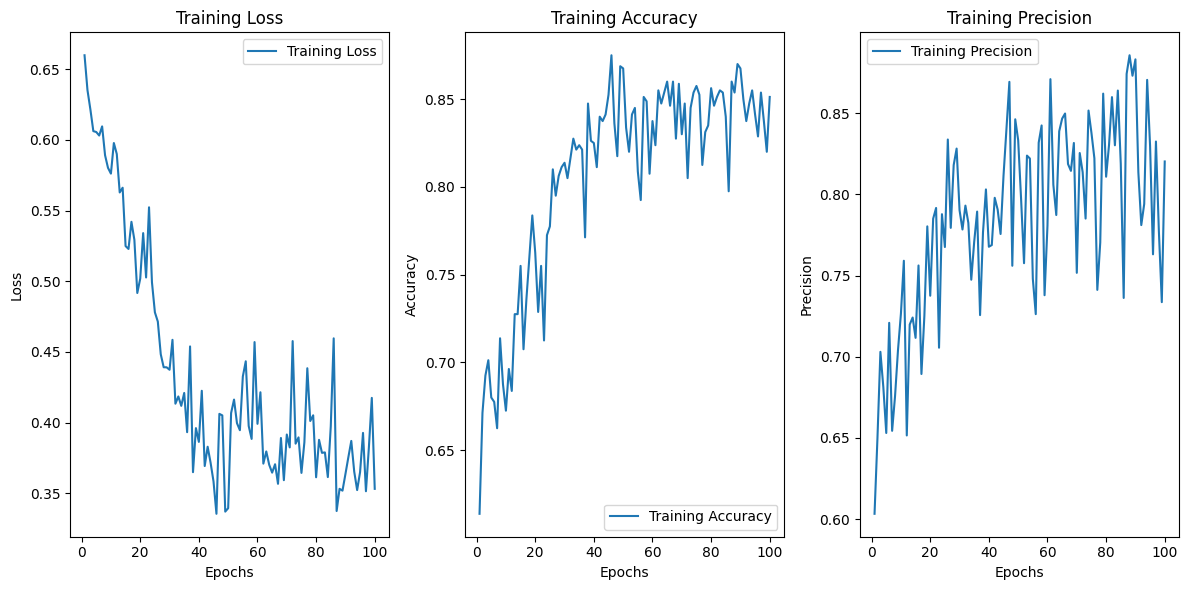

In [27]:
# Plot the training graphs
epochs = np.arange(1, len(train_losses) + 1)

plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 3, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 3, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

# Plot precision
plt.subplot(1, 3, 3)
plt.plot(epochs, train_precisions, label='Training Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Training Precision')
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
train_losses
train_accuracies
train_precisions

[0.6033210158348083,
 0.6501901149749756,
 0.7030162215232849,
 0.6812748908996582,
 0.6530612111091614,
 0.7208672165870667,
 0.6543967127799988,
 0.6758241653442383,
 0.7040572762489319,
 0.7264957427978516,
 0.7590758800506592,
 0.6515464186668396,
 0.7198067903518677,
 0.7241379022598267,
 0.7116182446479797,
 0.7561728358268738,
 0.6893787384033203,
 0.7251082062721252,
 0.780246913433075,
 0.7375565767288208,
 0.7850000262260437,
 0.7915691137313843,
 0.7055449485778809,
 0.7877461910247803,
 0.7675350904464722,
 0.8337129950523376,
 0.7793240547180176,
 0.8179824352264404,
 0.828125,
 0.7901960611343384,
 0.7783251404762268,
 0.7930174469947815,
 0.7824074029922485,
 0.7474120259284973,
 0.7707865238189697,
 0.7893462181091309,
 0.725623607635498,
 0.7765957713127136,
 0.8029925227165222,
 0.767699122428894,
 0.7687366008758545,
 0.7978261113166809,
 0.7905982732772827,
 0.7755510807037354,
 0.8114035129547119,
 0.8400900959968567,
 0.8692098259925842,
 0.7559999823570251,
 0.84

Let's determine flags for Overfitting and Underfitting.
- Overfitting: Overfitting would typically manifest as a large discrepancy between the training accuracy/precision and validation/test accuracy/precision. We would expect to see very high train accuracy and precision, but poor performance on unseen data (validation or test data).

- Underfitting: Underfitting usually occurs when the model fails to learn the underlying patterns in the data and performs poorly on both training and validation/test data.

*Let's analyze:*

To determine whether our model is overfitting, underfitting, or neither, we need to analyze the training and test performance metrics. Here's how we can interpret the provided information:

1. **Training Loss and Test Loss**: Training loss is the error during training, and test loss is the error on unseen data. In our case, the training losses are decreasing, which is a positive sign. Since our test loss is lower than your training loss, this suggests that the model is generalizing reasonably well.

2. **Training Accuracy and Test Accuracy**: Training accuracy measures how well our model performs on the training data, while test accuracy measures its performance on unseen data. Our training accuracies are increasing, which is a good sign. Our test accuracy is very close to your training accuracy, indicating decent generalization.

3. **Training Precision and Test Precision**: Precision measures the ratio of true positive predictions to the total predicted positives. Our training precisions are  increasing, which is a positive sign. The fact that our test precision is close to our training precision suggests good generalization.

Given the provided metrics and their trends, it seems that our model is performing well and generalizing to unseen data. The test loss, accuracy, and precision are all consistent with the training metrics, indicating that our model is neither overfitting nor underfitting.



In [32]:
# Saving model
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
model.save('/content/drive/My Drive/ML/PhishingClassification/my_model.h5')

In [34]:
from tensorflow.keras.models import load_model
saved_model = load_model('/content/drive/My Drive/ML/PhishingClassification/my_model.h5')

In [35]:
saved_model

In [37]:
df_all.columns

Index(['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'NumUnderscore', 'NumPercent',
       'NumQueryComponents', 'NumAmpersand', 'NumNumericChars',
       'HostnameLength', 'PathLength', 'QueryLength', 'NumDots_sq',
       'SubdomainLevel_sq', 'PathLevel_sq', 'UrlLength_sq', 'NumDash_sq',
       'NumDashInHostname_sq', 'NumUnderscore_sq', 'NumPercent_sq',
       'NumQueryComponents_sq', 'NumAmpersand_sq', 'NumNumericChars_sq',
       'HostnameLength_sq', 'PathLength_sq', 'QueryLength_sq'],
      dtype='object')

In [66]:
import pandas as pd
from urllib.parse import urlparse

def create_df(url):
  # Create a DataFrame to store the attributes
  url_data = pd.DataFrame(columns=['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
                                 'NumDashInHostname', 'NumUnderscore', 'NumPercent', 'NumQueryComponents',
                                 'NumAmpersand', 'NumNumericChars', 'HostnameLength', 'PathLength', 'QueryLength',
                                 'NumDots_sq', 'SubdomainLevel_sq', 'PathLevel_sq', 'UrlLength_sq', 'NumDash_sq',
                                 'NumDashInHostname_sq', 'NumUnderscore_sq', 'NumPercent_sq', 'NumQueryComponents_sq',
                                 'NumAmpersand_sq', 'NumNumericChars_sq', 'HostnameLength_sq', 'PathLength_sq',
                                 'QueryLength_sq'])

  # Populate the DataFrame with extracted attributes
  parsed_url = urlparse(url)
  num_dots = url.count('.')
  subdomain_level = len(parsed_url.netloc.split('.')) - 2  # Subtracting 2 for 'www'
  path_level = len(parsed_url.path.split('/')) - 1
  url_length = len(url)
  num_dash = url.count('-')
  num_dash_in_hostname = parsed_url.netloc.count('-')
  num_underscore = url.count('_')
  num_percent = url.count('%')
  num_query_components = len(parsed_url.query.split('&'))
  num_ampersand = url.count('&')
  num_numeric_chars = sum(c.isdigit() for c in url)
  hostname_length = len(parsed_url.netloc)
  path_length = len(parsed_url.path)
  query_length = len(parsed_url.query)

  # Calculate squared values
  num_dots_sq = num_dots ** 2
  subdomain_level_sq = subdomain_level ** 2
  path_level_sq = path_level ** 2
  url_length_sq = url_length ** 2
  num_dash_sq = num_dash ** 2
  num_dash_in_hostname_sq = num_dash_in_hostname ** 2
  num_underscore_sq = num_underscore ** 2
  num_percent_sq = num_percent ** 2
  num_query_components_sq = num_query_components ** 2
  num_ampersand_sq = num_ampersand ** 2
  num_numeric_chars_sq = num_numeric_chars ** 2
  hostname_length_sq = hostname_length ** 2
  path_length_sq = path_length ** 2
  query_length_sq = query_length ** 2

  url_data.loc[len(url_data)] = [num_dots, subdomain_level, path_level, url_length, num_dash,
                                   num_dash_in_hostname, num_underscore, num_percent, num_query_components,
                                   num_ampersand, num_numeric_chars, hostname_length, path_length, query_length,
                                   num_dots_sq, subdomain_level_sq, path_level_sq, url_length_sq, num_dash_sq,
                                   num_dash_in_hostname_sq, num_underscore_sq, num_percent_sq, num_query_components_sq,
                                   num_ampersand_sq, num_numeric_chars_sq, hostname_length_sq, path_length_sq,
                                   query_length_sq]

  # Display the DataFrame with extracted attributes and squared values
  return url_data


In [67]:

# Sample data with URLs
data = [
    "https://www.example.com/page1?param1=value1&param2=value2",
    "https://subdomain.example.com/page2?param1=value3",
    "https://www.example.com/page3",
]
# data[0]
url_df = create_df(data[0])


In [89]:
def predict_phishing(url):
  url_df = create_df(url)
  print(url_df)
  # Reshape the input array to match the expected input shape of the model
  url_df_numpy = url_df.to_numpy()
  reshaped_url_df = url_df_numpy.reshape(1, -1)  # Reshape to (1, 28) assuming batch size of 1

  prediction = saved_model.predict(reshaped_url_df)
  best_pred = np.argmax(prediction)
  return prediction, best_pred

In [48]:
# create a function that takes in a url and extracts its attributes so it can be sent to the model
# Create your ones array
ones_array = np.array([1] * 28)

# Reshape the input array to match the expected input shape of the model
reshaped_ones_array = ones_array.reshape(1, -1)  # Reshape to (1, 28) assuming batch size of 1


In [95]:
predict_phishing("//llwww.google/maps")

   NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  NumDashInHostname  \
0        1               0          1         19        0                  0   

   NumUnderscore  NumPercent  NumQueryComponents  NumAmpersand  ...  \
0              0           0                   1             0  ...   

   NumDash_sq  NumDashInHostname_sq  NumUnderscore_sq  NumPercent_sq  \
0           0                     0                 0              0   

   NumQueryComponents_sq  NumAmpersand_sq  NumNumericChars_sq  \
0                      1                0                   0   

   HostnameLength_sq  PathLength_sq  QueryLength_sq  
0                144             25               0  

[1 rows x 28 columns]
1/1 [==============================] - 0s 25ms/step


(array([[0.69694406]], dtype=float32), 0)

In [91]:
your_input = "https://ww---w.google.com/maps"
prediction = saved_model.predict(reshaped_ones_array)
best_pred = np.argmax(prediction)

1/1 [==============================] - 0s 69ms/step


In [50]:
best_pred

0